In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.shape


(891, 12)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df=df.drop(['Name','Ticket'],axis='columns')

In [10]:
df.isna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace= True)
df['Embarked'].fillna('Not Available' , inplace = True )   
df['Cabin'].fillna(method='ffill',inplace = True)

In [14]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
df['Cabin'].value_counts()

G6             24
B78            21
C78            20
C23 C25 C27    19
C83            19
               ..
C90             1
C101            1
C62 C64         1
F G63           1
E10             1
Name: Cabin, Length: 147, dtype: int64

<AxesSubplot:>

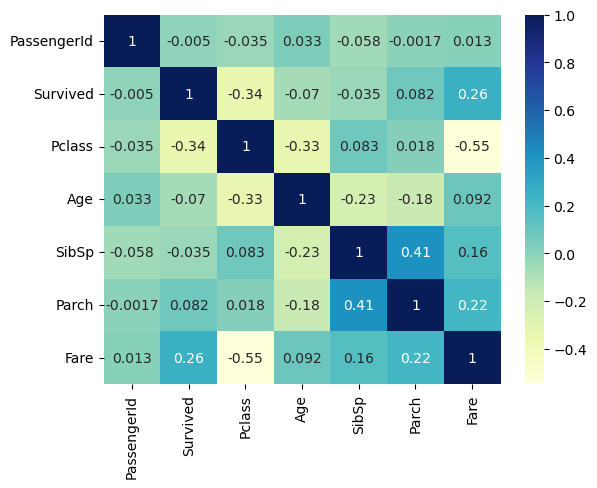

In [16]:
#correlation
sns.heatmap(df.corr(),cmap='YlGnBu',annot= True)

In [17]:
dummies=pd.get_dummies(df['Sex'])
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [95]:
merged=pd.concat([df,dummies],axis=1)
merged

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,1.0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,141.0,2.0,0,1
2,3.0,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,75.0,2.0,1,0
3,4.0,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000,54.0,2.0,1,0
4,5.0,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,54.0,2.0,0,1
5,6.0,0.0,3.0,1.0,29.699118,0.0,0.0,8.4583,54.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [18]:
#fare_mean=sum(df['Fare'])/len(df['Fare'])
#fare_mean
fare_mean=df['Fare'].mean()
fare_mean

32.2042079685746

In [19]:
(df==0).sum()

PassengerId      0
Survived       549
Pclass           0
Sex              0
Age              0
SibSp          608
Parch          678
Fare            15
Cabin            0
Embarked         0
dtype: int64

In [20]:
df['Fare']=df['Fare'].replace([0],fare_mean)


In [21]:
(df==0).sum()

PassengerId      0
Survived       549
Pclass           0
Sex              0
Age              0
SibSp          608
Parch          678
Fare             0
Cabin            0
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Fare'>

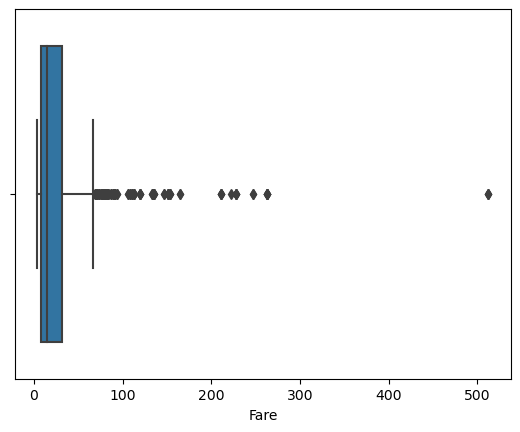

In [22]:
sns.boxplot(x=df["Fare"])

In [74]:
q1=np.percentile(df['Fare'],25,interpolation='midpoint')
q3=np.percentile(df['Fare'],75,interpolation='midpoint')
IQR=q3-q1
print("old shape :",df.shape)
#upper bound
ul=(q3+1.5*IQR)
#lower bound
ll=(q3-1.5*IQR)
#outliers
#df.drop(Upperlimit[0],inplace=True)
#df.drop(Lowerlimit[0],inplace=True)
#print('new shape :',df.shape)


old shape : (777, 10)


C:\Users\SHYNI\AppData\Local\Temp\ipykernel_7324\237772580.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1=np.percentile(df['Fare'],25,interpolation='midpoint')
C:\Users\SHYNI\AppData\Local\Temp\ipykernel_7324\237772580.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3=np.percentile(df['Fare'],75,interpolation='midpoint')


In [83]:
df2=df[(df.Fare>ll)&(df.Fare<ul)]
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,141,2
2,3,1,3,0,26.000000,0,0,7.9250,75,2
3,4,1,1,0,35.000000,1,0,53.1000,54,2
4,5,0,3,1,35.000000,0,0,8.0500,54,2
5,6,0,3,1,29.699118,0,0,8.4583,54,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,67,2
887,888,1,1,0,19.000000,0,0,30.0000,30,2
888,889,0,3,0,29.699118,1,2,23.4500,30,2
889,890,1,1,1,26.000000,0,0,30.0000,59,0


<AxesSubplot:xlabel='Fare'>

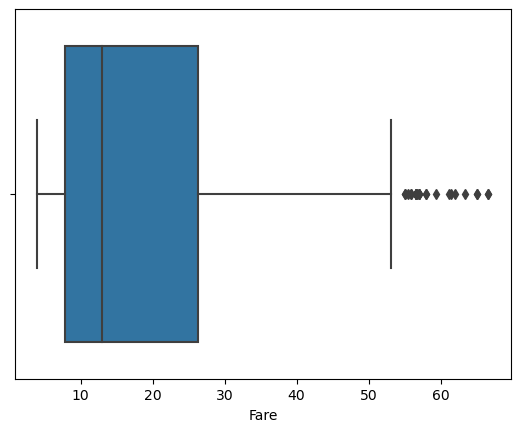

In [85]:
sns.boxplot(x=df['Fare'])

<AxesSubplot:xlabel='Fare'>

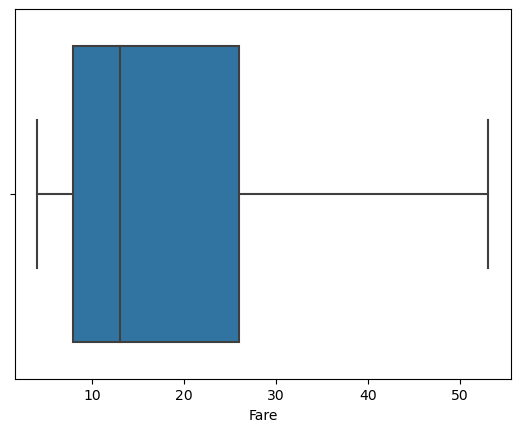

In [86]:
sns.boxplot(x=df2['Fare'])

In [25]:
print(df.shape)


(777, 10)


In [26]:
print(len(Lowerlimit), len(Upperlimit))
Upperlimit


1 1


(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257, 258,
        262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311,
        318, 319, 324, 325, 332, 334, 337, 341, 366, 369, 373, 375, 377,
        380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496, 498,
        504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587,
        591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698,
        700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765, 779, 789,
        792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype=int64),)

In [27]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [28]:
df.Sex=label.fit_transform(df.Sex)
df.Embarked=label.fit_transform(df.Embarked)
df.Cabin=label.fit_transform(df.Cabin)

In [29]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,141,2
2,3,1,3,0,26.000000,0,0,7.9250,75,2
3,4,1,1,0,35.000000,1,0,53.1000,54,2
4,5,0,3,1,35.000000,0,0,8.0500,54,2
5,6,0,3,1,29.699118,0,0,8.4583,54,1


In [30]:
#Feature scalining
x= df.drop("Survived",axis="columns")
y = df['Survived']

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=1)

In [65]:
x_train.describe().round().head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0
mean,447.0,2.0,1.0,29.0,0.0,0.0,19.0,75.0,2.0
std,256.0,1.0,0.0,13.0,1.0,1.0,14.0,41.0,1.0
min,3.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
25%,220.0,2.0,0.0,22.0,0.0,0.0,8.0,41.0,2.0


In [66]:
x_train=pd.DataFrame(x_train)
print(type(x_train))

print(type(x_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


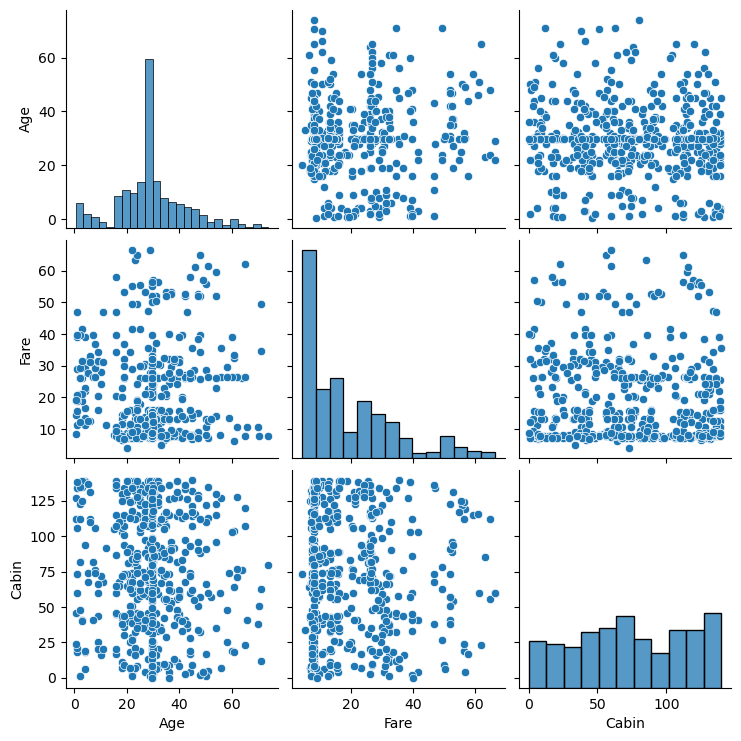

In [67]:
sns.pairplot(x_train, vars=['Age','Fare','Cabin'])

In [88]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train2 = sc.fit_transform(x_train)

In [90]:
print(type(x_train2))
x_train2=pd.DataFrame(x_train2)
print(type(x_train2))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [91]:
x_train2.describe().round()

,0,1,2,3,4,5,6,7,8
count,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0,543.0
mean,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-2.0,-1.0,-0.0,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-2.0,-1.0,-1.0,-0.0,-1.0,-1.0,1.0
50%,0.0,1.0,1.0,0.0,-1.0,-0.0,-0.0,-0.0,1.0
75%,1.0,1.0,1.0,0.0,1.0,-0.0,1.0,1.0,1.0
max,2.0,1.0,1.0,3.0,5.0,7.0,3.0,2.0,1.0


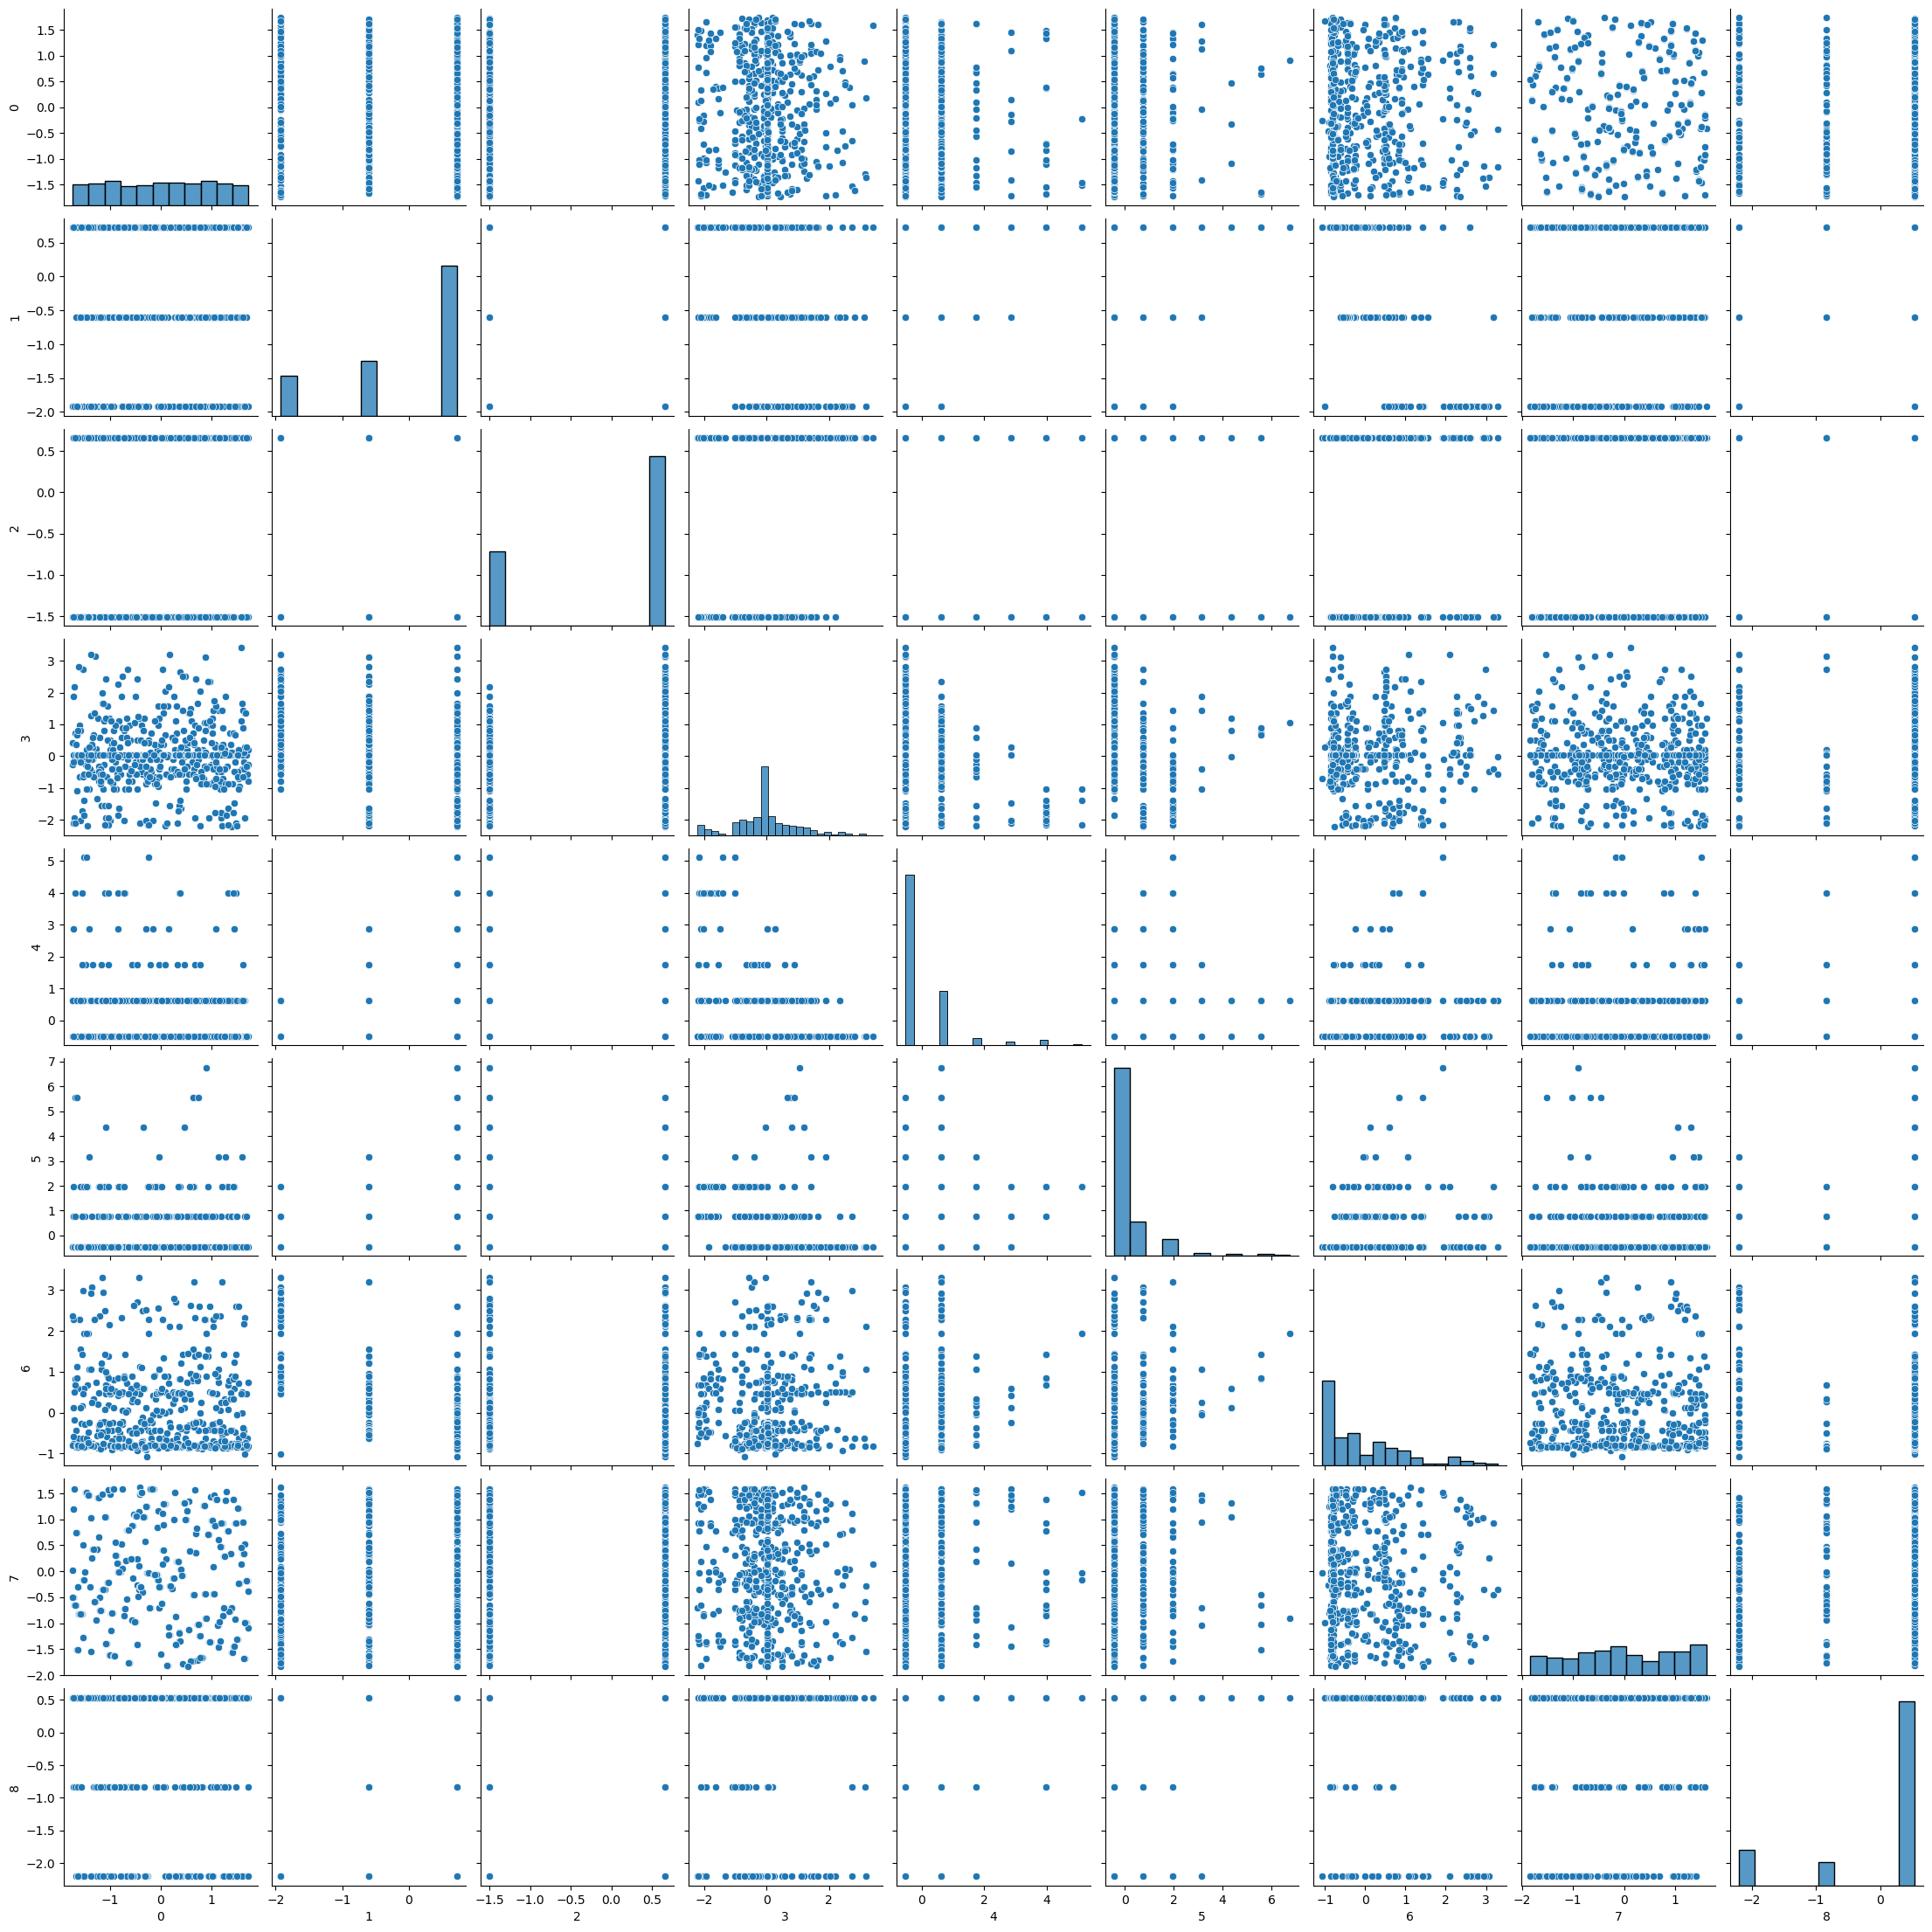

In [94]:
sns.pairplot(x_train2, vars = [0,1,2,3,4,5,6,7,8])